## Perfect Distribution and Perturbed Distances

Here we show how the perfect distance estimation results would look like if the model learned exactly the distance we are teaching it to learn. Since in simulated dataset we have the information about the true orientations for each projection, we are able to calculate this perfect distance.

In [1]:
ROOT_DIR = "../.."

In [26]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [24]:
import os
import h5py
import numpy as np   
import matplotlib.pyplot as plt
import sys
sys.path.append(ROOT_DIR) 
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : True})
from cryoem.projections import RotationMatrix
from cryoem.conversions import euler2quaternion, d_q
from cryoem.plots import plot_angles_histogram, plot_quaternions_histogram, plot_distances_histogram,plot_dP_dQ

In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1505405743520027371
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 519758958247104366
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16059559465138505741
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3403939840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10222489035974451247
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Read data

In [5]:
# full sphere coverage with non-uniform distribution
projections_filename = "../../data/5j0n_full.h5"

# load structures
data_full_5k = h5py.File(projections_filename, 'r')
angles_true = np.array(data_full_5k['Angles'], dtype=np.float32)
projections = np.array(data_full_5k['Projections'], dtype=np.float32)
label = "Full-coverage, Euler uniform"


print(f"{angles_true.shape[0]} projections of images with dimension {projections.shape[1:]} pixels")
print(f"{angles_true.shape[0]} sets of {angles_true.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


### Distance function 

In [6]:
def d_p(in1, in2, sigma=0.0):
    dist = d_q(in1, in2)
    norm_distr = tf.random.normal(shape=dist.shape, mean=dist, stddev=sigma, dtype=tf.float64)
    return norm_distr  

### Summary of Distance Estimation Errors

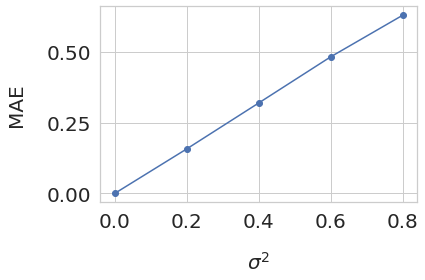

In [25]:
variances = np.arange(0, 0.81, 0.2)
mae_losses = np.array([0., 0.15689836267757215, 0.3188341639092848, 0.4815986111775743, 0.6282860839084559 ])

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_xlabel('$\sigma^2$', fontsize=20, labelpad=20)
ax.plot(variances, mae_losses, marker="o")
ax.set_ylabel('MAE', fontsize=20, labelpad=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

### Experiment with Different Level of Perturbation in the Distance

#### Perfect distance - variance 0.0

In [8]:
sigma = 0.0

In [9]:
idx1 = list(np.random.choice(range(5000), size=5000))
idx2 = list(np.random.choice(range(5000), size=5000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dP_values = d_p(q1_true, q2_true, sigma=sigma)
dQ_values = d_q(q1_true, q2_true)

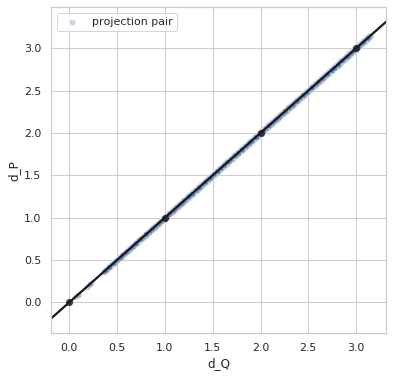

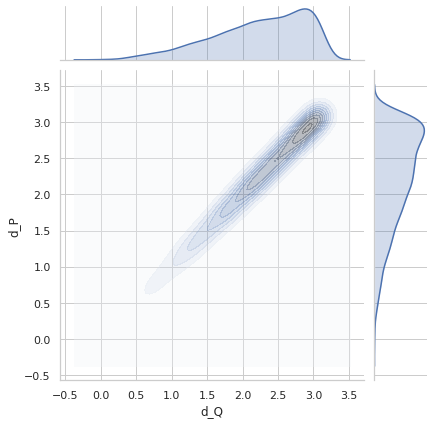

Variance = 0.0
Min. angle recovery loss possible = 0.0
MAE:  0.0


In [10]:
plot_dP_dQ(dP_values, dQ_values);

#### Perfect distance - variance 0.2

In [11]:
sigma = 0.2

In [12]:
idx1 = list(np.random.choice(range(5000), size=5000))
idx2 = list(np.random.choice(range(5000), size=5000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dP_values = d_p(q1_true, q2_true, sigma=sigma)
dQ_values = d_q(q1_true, q2_true)

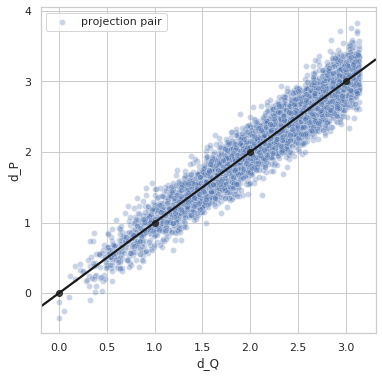

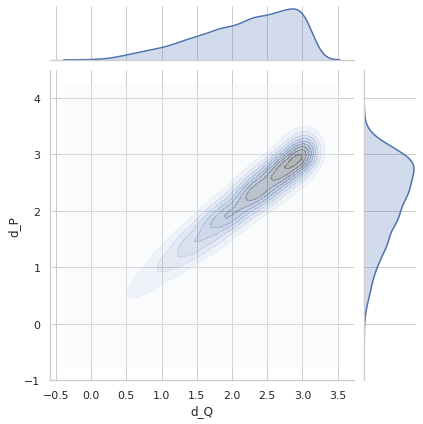

Variance = 0.1993426198789939
Min. angle recovery loss possible = 0.03972953260420102
MAE:  0.1591401295213378


In [13]:
plot_dP_dQ(dP_values, dQ_values);

#### Perfect distance - variance 0.4

In [14]:
sigma = 0.4

In [15]:
idx1 = list(np.random.choice(range(5000), size=5000))
idx2 = list(np.random.choice(range(5000), size=5000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dP_values = d_p(q1_true, q2_true, sigma=sigma)
dQ_values = d_q(q1_true, q2_true)

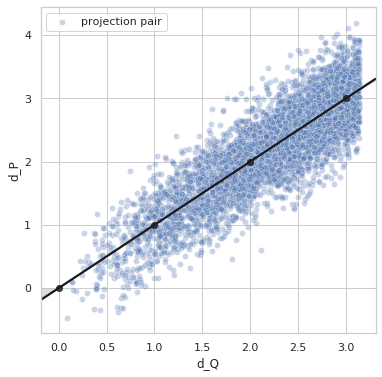

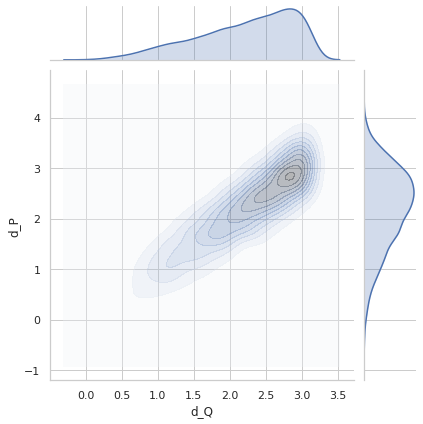

Variance = 0.3961111207599355
Min. angle recovery loss possible = 0.1568726391856943
MAE:  0.31576109994990476


In [16]:
plot_dP_dQ(dP_values, dQ_values);

#### Perfect distance - variance 0.6

In [17]:
sigma = 0.6

In [18]:
idx1 = list(np.random.choice(range(5000), size=5000))
idx2 = list(np.random.choice(range(5000), size=5000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dP_values = d_p(q1_true, q2_true, sigma=sigma)
dQ_values = d_q(q1_true, q2_true)

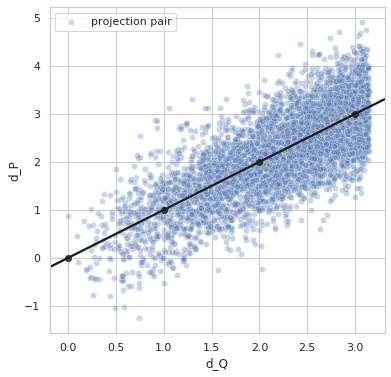

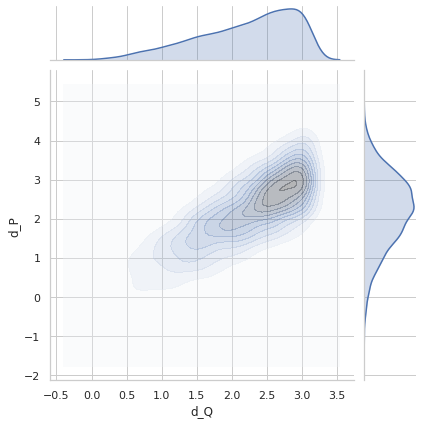

Variance = 0.5944172413987011
Min. angle recovery loss possible = 0.3532611905006673
MAE:  0.4726070603375149


In [19]:
plot_dP_dQ(dP_values, dQ_values);

#### Perfect distance - variance 0.8

In [20]:
sigma = 0.8

In [21]:
idx1 = list(np.random.choice(range(5000), size=5000))
idx2 = list(np.random.choice(range(5000), size=5000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

dP_values = d_p(q1_true, q2_true, sigma=sigma)
dQ_values = d_q(q1_true, q2_true)

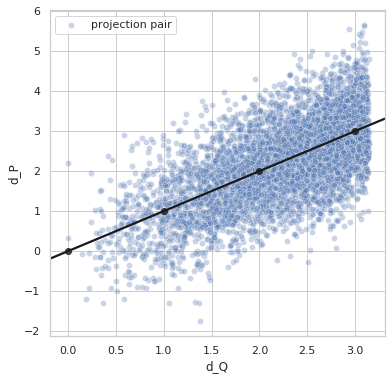

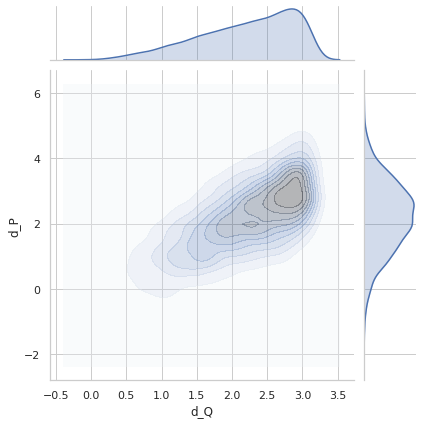

Variance = 0.8182529680950135
Min. angle recovery loss possible = 0.6694040122123399
MAE:  0.6531331348161634


In [22]:
plot_dP_dQ(dP_values, dQ_values);